In [50]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv('example2.env')

True

In [3]:
#Set current amount of crypto assets
my_btc=1.2
my_eth=5.3

In [4]:
btc_url="https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url="https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!
eth_response=requests.get(eth_url).json()
eth_price=eth_response['data']['1027']['quotes']['USD']['price']

# Compute current value of my crypto
# YOUR CODE HERE!
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $39829.20
The current value of your 5.3 ETH is $9396.42


In [39]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [40]:
#Set alpaca api key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#Create the alpaca API object

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [41]:
 # Format current date as ISO format
today = pd.Timestamp('2020-05-01', tz='America/New_York').isoformat()
#Set the tickers

tickers=["AGG","SPY"]

#Set timeframe to "1Day" for Alpaca API
timeframe="1Day"

#Get current closing prices for SPY and AGG
df_investments = api.get_bars(
    tickers,
    timeframe,
    start=today
).df


#Reorganize the dataframe
#Separate ticker data
SPY=df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
AGG=df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

#Concatenate the ticker dataframes
df_investments = pd.concat((SPY,AGG),axis=1,keys=['AGG','SPY'])

#Preview DataFrame
df_investments.head()

AGG                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2020-05-01 04:00:00+00:00  116.87  117.0998  116.6775       24394  116.97   
2020-05-04 04:00:00+00:00  116.97  117.0900  116.8700       15546  116.89   
2020-05-05 04:00:00+00:00  116.88  116.9700  116.8100       15147  116.96   
2020-05-06 04:00:00+00:00  116.41  116.7100  116.3000       20234  116.44   
2020-05-07 04:00:00+00:00  116.77  116.7700  116.4200       15964  116.61   

                                                   SPY                      \
                            volume        vwap   close      high       low   
timestamp                                                                    
2020-05-01 04:00:00+00:00  6331654  116.846992  282.83  290.6572  281.5200   
2020-05-04 04:00:00+00:00  3803239  116.960894  283.59  283.9000  279.1300   
2020-05-05 04:00:00+00:00  5593693  116.879703  286.15  289.2500  283.7134   
2020-05-06 04:00:00+00:00  7832788  116.423669  284.34  288.4600  283.7800   
2020-05-07 04:00:00+00:00  3914327  116.646007  287.70  289.7800  287.1300   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00      639155  285.31  127002350  284.074074  
2020-05-04 04:00:00+00:00      460683  280.74   81813464  281.785875  
2020-05-05 04:00:00+00:00      459766  286.64   80363726  287.388247  
2020-05-06 04:00:00+00:00      436221  288.04   74268760  286.080459  
2020-05-07 04:00:00+00:00      422689  287.75   75995625  287.986917

In [42]:
#Pick AGG and SPY close prices
agg_close_price=float(df_investments['AGG']['close'][0])
spy_close_price=float(df_investments['SPY']['close'][0])
#Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [43]:
#Compute the current value of shares
my_spy_value= spy_close_price*my_spy
my_agg_value=agg_close_price*my_agg
#Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


In [44]:
#Set monthly household income
monthly_income=12000
#Consolidate financial assets data
savings_data = [
    my_btc_value + my_eth_value,
    my_spy_value + my_agg_value,
]

#Create savings DataFrame
#YOUR CODE HERE
df_savings=pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'shares'])
#Display savings DataFrame
display(df_savings)

,amount
crypto,49225.623
shares,37515.500


<Axes: title={'center': 'Savings'}, ylabel='amount'>

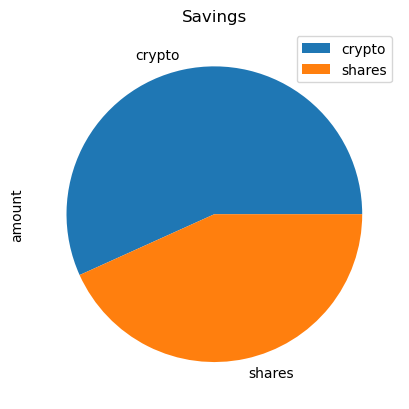

In [45]:
#Plot savings pie chart
df_savings.plot.pie(y='amount',title='Savings')

In [46]:
#Set ideal emergency fund
emergency_fund=monthly_income*3

#Calculate total amount of savings
total_savings=sum(savings_data)
#Validate savings health
if total_savings > emergency_fund:
    print("Congratulations! You have enough for the emergency fund!")
if total_savings == emergency_fund:
    print("Congratulations!You've reached your financial goal!")
if total_savings < emergency_fund:
    print(f"You have ${emergency_fund-total_savings} until you reach your goal.")

Congratulations! You have enough for the emergency fund!


Part 2: Retirement Planning
Monte Carlo simulation

In [47]:
#Set start and end dates of five years back from today
#Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [49]:
# Get 5 years' worth of historical data for SPY and AGG
historical_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
historical_data=pd.concat([historical_data],axis=1)
# Separate ticker data
SPY=historical_data[historical_data['symbol']=='AGG'].drop('symbol', axis=1)
AGG=historical_data[historical_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data=pd.concat((SPY,AGG),axis=1,keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [55]:

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
future_shares = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)


In [17]:
# Printing the simulation input data 
future_shares.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
#Putting results in dataframe for future commands
future_shares_df=pd.DataFrame(future_shares.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 110.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 120.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 130.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 140.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 150.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 160.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 170.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 180.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 190.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 200.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 210.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 220.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 230.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 240.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 250.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 260.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 270.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 280.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 290.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 300.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 310.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 320.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 330.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 340.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 350.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 360.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 370.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 380.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 390.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 400.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 410.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 420.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 430.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 440.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 450.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 460.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 470.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 480.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 490.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

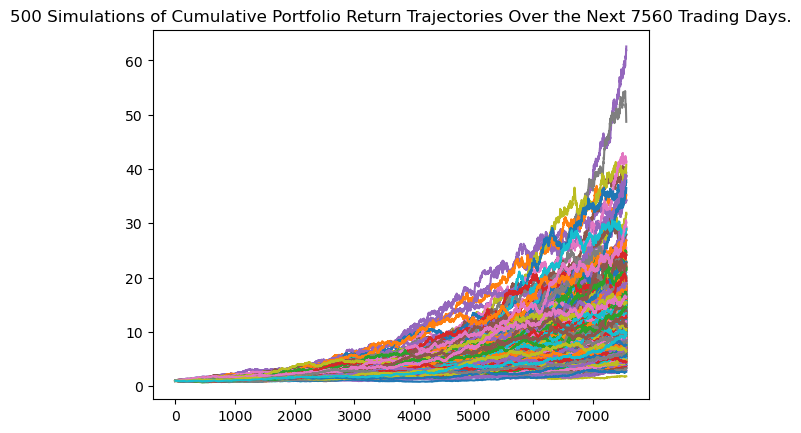

In [19]:
# Plot simulation outcomes
line_plot=future_shares.plot_simulation()

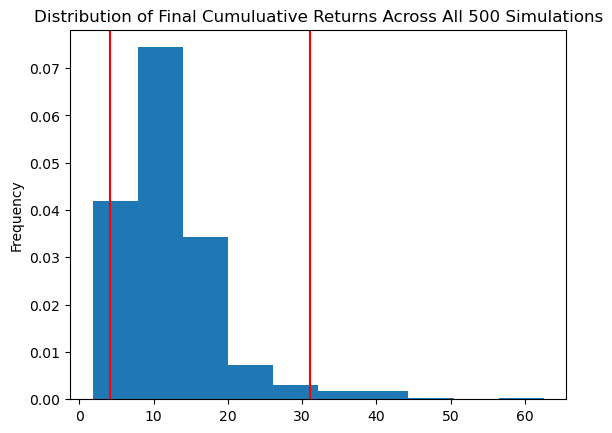

In [20]:
# Plot probability distribution and confidence intervals
dist_plot=future_shares.plot_distribution()

summarize_cumulative_return command wasn't working. 
So had to come up with different method.

In [21]:
 # Fetch summary statistics from the Monte Carlo simulation results
stats = future_shares_df.iloc[-1].describe()
# Print summary statistics
print(stats)

count    500.000000
mean      12.249060
std        6.916644
min        1.805483
25%        7.775410
50%       10.947210
75%       15.030126
max       62.557815
Name: 7560, dtype: float64


In [22]:
#Calculating for cilower and ciupper
ci_lower_original=stats.quantile(0.05)
ci_upper_original=stats.quantile(0.95)
#Printing the results
print(ci_lower_original)
print(ci_upper_original)

3.594389253169007
346.89523509103117


In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(ci_lower_original*20000,2)
ci_upper=round(ci_upper_original*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71887.79 and $6937904.7


In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(ci_lower_original*initial_investment,2)
ci_upper=round(ci_upper_original*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $107831.68 and $10406857.05


In [25]:

# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
future_shares_5y = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation=500,
    num_trading_days=252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
future_shares_5y_df=pd.DataFrame(future_shares_5y.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 110.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 120.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 130.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 140.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 150.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 160.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 170.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 180.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 190.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 200.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 210.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 220.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 230.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 240.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 250.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 260.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 270.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 280.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 290.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 300.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 310.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 320.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 330.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 340.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 350.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 360.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 370.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 380.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 390.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 400.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 410.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 420.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 430.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 440.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 450.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 460.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 470.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 480.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 490.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

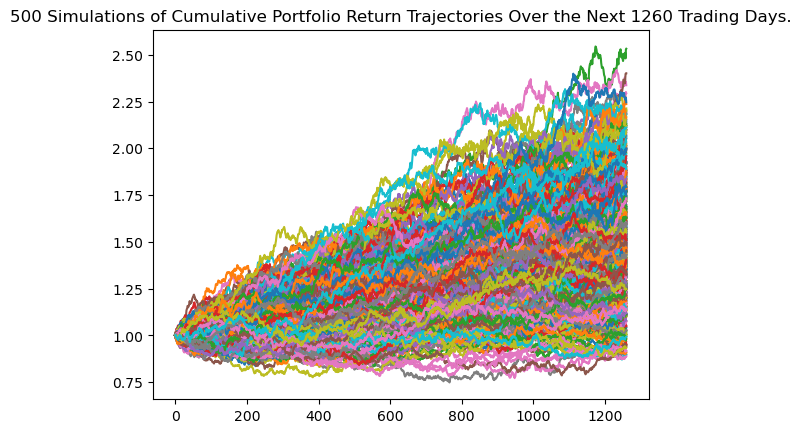

In [27]:
 # Plot simulation outcomes
line_plot2=future_shares_5y.plot_simulation()

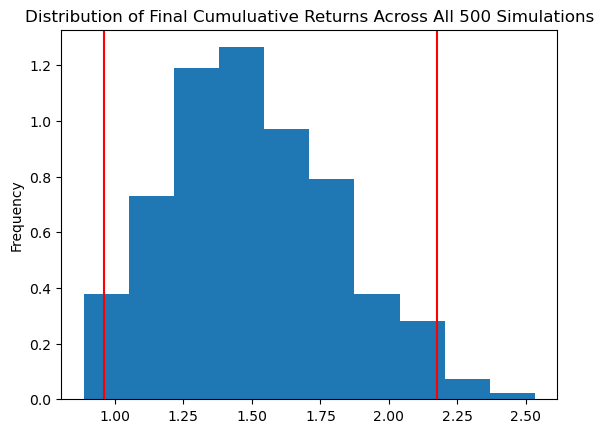

In [28]:
# Plot probability distribution and confidence intervals
dist_plot2=future_shares_5y.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
stats2 = future_shares_5y_df.iloc[-1].describe()

# Print summary statistics
print(stats2)

count    500.000000
mean       1.506897
std        0.309415
min        0.887040
25%        1.276152
50%        1.482774
75%        1.719878
max        2.532424
Name: 1260, dtype: float64


In [30]:
#Calculating for lower and uppper
ci_lower_2=stats2.quantile(0.05)
ci_upper_2=stats2.quantile(0.95)
#Printing results
print(ci_lower_2)
print(ci_upper_2)

0.5115835703159813
325.8863485382579


In [31]:
# Set initial investment
initial_investment=10000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(ci_lower_2*initial_investment,2)
ci_upper_five=round(ci_upper_2*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $10000 in the portfolio over the next 5 years will end within in the range of $5115.84 and $3258863.49


In [32]:

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
future_shares_ten = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation=500,
    num_trading_days=252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
future_shares_ten_df=pd.DataFrame(future_shares_ten.calc_cumulative_return())

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 110.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 120.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 130.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 140.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 150.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 160.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 170.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 180.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 190.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 200.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 210.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 220.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 230.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 240.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 250.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 260.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 270.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 280.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 290.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 300.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 310.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 320.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 330.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 340.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 350.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 360.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 370.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 380.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 390.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 400.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 410.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 420.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 430.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 440.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 450.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 460.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 470.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 480.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

Running Monte Carlo simulation number 490.


C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\awhun\Jupyter-Workspace\Module5\Module5\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of callin

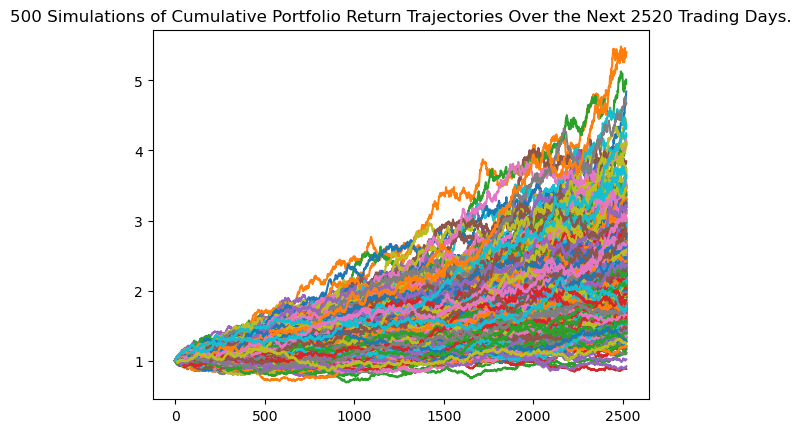

In [34]:
 # Plot simulation outcomes
line_plot3=future_shares_ten.plot_simulation()

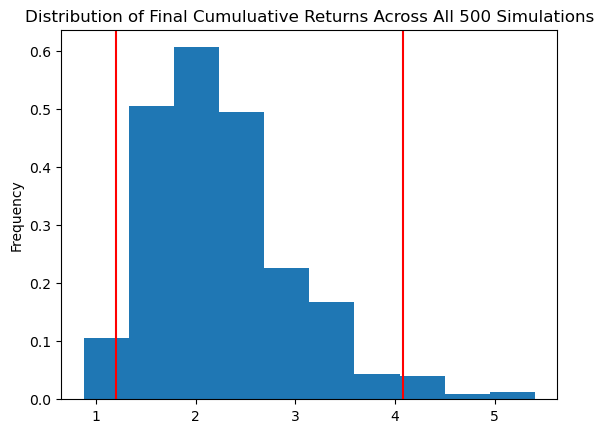

In [35]:
# Plot probability distribution and confidence intervals
dist_plot3=future_shares_ten.plot_distribution()

In [36]:
 # Fetch summary statistics from the Monte Carlo simulation results
stats3=future_shares_ten_df.iloc[-1].describe()

# Print summary statistics
print(stats3)

count    500.000000
mean       2.270092
std        0.714006
min        0.880587
25%        1.753248
50%        2.157612
75%        2.627504
max        5.402054
Name: 2520, dtype: float64


In [37]:
#Calculating for ciupper and cilower
ci_lower3=stats3.quantile(0.05)
ci_upper3=stats3.quantile(0.95)
#Printing results
print(ci_lower3)
print(ci_upper3)

0.7723094489942844
326.89071905128185


In [38]:
# Set initial investment
initial_investment=60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(ci_lower3*initial_investment,2)
ci_upper_ten=round(ci_upper3*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $46338.57 and $19613443.14
